In [ ]:
# Importing all the necessary libraries

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Numerical libraries
import numpy as np   

# to handle dataframe 
import pandas as pd    

# For visualization
import matplotlib.pyplot as plt   
import seaborn as sns

## Question 1: Read the dataset and understand the features and target variable.

In [5]:
# Reading the dataset file

colls = ['Industrial_Risk','Management_Risk', 'Financial_Flexibility', 'Credibility',
       'Competitiveness', 'Operating_Risk', 'target']

df = pd.read_csv('Qualitative_Bankruptcy.data.txt', names = colls)
print(df.shape)

(250, 7)


In [7]:

df.head(10)

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,target
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
6,P,P,A,P,P,P,NB
7,P,P,P,A,A,P,NB
8,P,P,A,P,A,P,NB
9,P,P,A,A,P,P,NB


In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial_Risk          250 non-null object
Management_Risk          250 non-null object
Financial_Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating_Risk           250 non-null object
target                   250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [9]:
df.isnull().sum()
#df.isna().sum()

Industrial_Risk          0
Management_Risk          0
Financial_Flexibility    0
Credibility              0
Competitiveness          0
Operating_Risk           0
target                   0
dtype: int64

In [10]:
pd.value_counts(df['target'])

NB    143
B     107
Name: target, dtype: int64

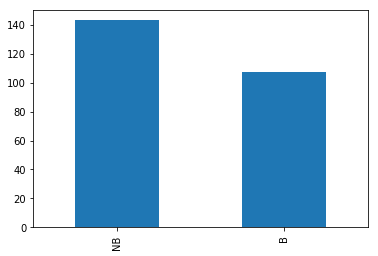

In [11]:
pd.value_counts(df['target']).plot(kind='bar')

### Target is not imbalanced. Hence model gets equal opportunity to learn from both classes

## Question 2: Encode independent features.

In [12]:
df.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,target
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [13]:
df.replace({'P' : 1, 'A' : 0, 'N' : -1, 'B' : 0, 'NB' : 1}, inplace=True)
df.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,target
0,1,1,0,0,0,1,1
1,-1,-1,0,0,0,-1,1
2,0,0,0,0,0,0,1
3,1,1,1,1,1,1,1
4,-1,-1,1,1,1,-1,1


In [14]:
#Identify the correlation between features
df.corr()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,target
Industrial_Risk,1.000000,0.255127,0.162624,0.014438,0.257814,0.144507,0.227823
Management_Risk,0.255127,1.000000,0.254845,0.303341,0.306568,0.213874,0.370838
Financial_Flexibility,0.162624,0.254845,1.000000,0.524951,0.686612,0.116903,0.751020
Credibility,0.014438,0.303341,0.524951,1.000000,0.675689,0.288458,0.755909
Competitiveness,0.257814,0.306568,0.686612,0.675689,1.000000,0.211383,0.899452
Operating_Risk,0.144507,0.213874,0.116903,0.288458,0.211383,1.000000,0.279786
target,0.227823,0.370838,0.751020,0.755909,0.899452,0.279786,1.000000


## Question 3: Separate the dependant variable from the rest of the data.

In [15]:
# Seperate the dependent and inependent columns
X = df.drop("target" , axis=1)

y = df['target']

In [18]:
print (X.shape, y.shape)

(250, 6) (250,)


## Question 4: Split the dataset into training and test data.

In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=.20, random_state=1)

## Question 5: Apply PCA on the independent features of train data.

In [26]:
from scipy.stats import zscore
X_ZS = train_set.apply(zscore)

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_ZS)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca.components_

array([[ 0.2659426 ,  0.33347355,  0.48174247,  0.48459943,  0.54086354,
         0.24212421],
       [-0.59062087, -0.40429833,  0.33348871,  0.27748678,  0.21861727,
        -0.50169981],
       [-0.56170369, -0.07162781, -0.20576748,  0.33298399, -0.11530248,
         0.71613209],
       [-0.38014816,  0.83579648, -0.12074163,  0.10097427, -0.16670313,
        -0.32305934],
       [ 0.25501963, -0.12628462, -0.68920856,  0.59347521,  0.15194525,
        -0.26212317],
       [-0.2353356 ,  0.07552579, -0.35324529, -0.46354882,  0.77168722,
         0.06125443]])

In [29]:
pca.explained_variance_

array([2.63310162, 1.10348142, 0.90979463, 0.74348799, 0.40535645,
       0.23492863])

# Question 6: Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance)

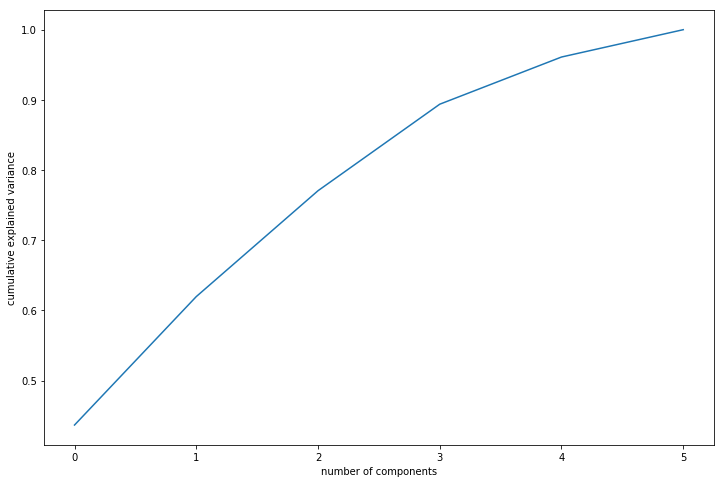

In [30]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Qestion 7: Transform the data using PCA

In [31]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 3)

In [49]:
pca1.fit(X_ZS)
x_train = pca1.fit_transform(X_ZS)


X_test_zs = test_set.apply(zscore)
x_test = pca1.transform(X_test_zs)

## Question 8: Apply KMeans algorithm on the above transformed data

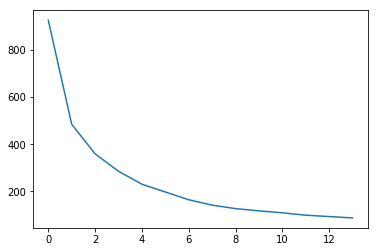

In [50]:
from sklearn import metrics
from sklearn.cluster import KMeans

ssd = []
for num_clusters in list(range(1,15)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(x_train)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

## Qestion 9: Select optimal number of clusters and form clusters out of the train data

In [51]:
kmeans = KMeans(n_clusters = 2, max_iter=50, random_state= 2) # although the elbow seems to be at around 5,we picked 2 clusters,
                                                               #because our target class has two levels
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [52]:
kmeans.cluster_centers_

array([[-1.63974677, -0.23747678, -0.00537362],
       [ 1.31475192,  0.19040931,  0.00430858]])

In [53]:
y_train_pca = kmeans.predict(x_train)

In [54]:
y_train_pca

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1], dtype=int32)

In [56]:
y_test_pca = kmeans.predict(x_test)

## Question 10: Create a new column in the train data and populate it with the cluster labels.

In [57]:
X_train_pca = pd.DataFrame(x_train, columns=['pc1','pc2','pc3'])
X_test_pca = pd.DataFrame(x_test, columns=['pc1','pc2','pc3'])

In [58]:
X_train_pca['cluster_label'] = y_train_pca

In [59]:
X_test_pca['cluster_label'] = y_test_pca

In [60]:
X_train_pca.head(2)

,pc1,pc2,pc3,cluster_label
0,-1.717363,-0.515573,-0.861955,0
1,-0.323897,-0.681491,0.617165,0


In [61]:
X_test_pca.head(2)

,pc1,pc2,pc3,cluster_label
0,0.338037,-0.328772,-1.138772,1
1,-0.969095,-0.986342,-0.497167,0


## Qestion 13: Apply any classification model (example: Logistic Regression) on train dataset and predict target for test dataset.

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_pca, train_labels)

result = model.score(X_train_pca, train_labels)
print(result)

0.985


/Users/Amitbhat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Question 14: Check accuracy and confusion matrix.

In [65]:
result = model.score(X_test_pca, test_labels)
print(result)

1.0


In [67]:
# Predicting model

y_predict = model.predict(X_test_pca)


metrics.confusion_matrix(test_labels, y_predict)


array([[21,  0],
       [ 0, 29]])